# ML Model to Classify into 102 Classes
"pink primrose",
    "hard-leaved pocket orchid",
    "canterbury bells",
    "sweet pea",
    "english marigold",
    "tiger lily",
    "moon orchid",
    "bird of paradise",
    "monkshood",
    "globe thistle",
    "snapdragon",
    "colt's foot",
    "king protea",
    "spear thistle",
    "yellow iris",
    "globe-flower",
    "purple coneflower",
    "peruvian lily",
    "balloon flower",
    "giant white arum lily",
    "fire lily",
    "pincushion flower",
    "fritillary",
    "red ginger",
    "grape hyacinth",
    "corn poppy",
    "prince of wales feathers",
    "stemless gentian",
    "artichoke",
    "sweet william",
    "carnation",
    "garden phlox",
    "love in the mist",
    "mexican aster",
    "alpine sea holly",
    "ruby-lipped cattleya",
    "cape flower",
    "great masterwort",
    "siam tulip",
    "lenten rose",
    "barbeton daisy",
    "daffodil",
    "sword lily",
    "poinsettia",
    "bolero deep blue",
    "wallflower",
    "marigold",
    "buttercup",
    "oxeye daisy",
    "common dandelion",
    "petunia",
    "wild pansy",
    "primula",
    "sunflower",
    "pelargonium",
    "bishop of llandaff",
    "gaura",
    "geranium",
    "orange dahlia",
    "pink-yellow dahlia?",
    "cautleya spicata",
    "japanese anemone",
    "black-eyed susan",
    "silverbush",
    "californian poppy",
    "osteospermum",
    "spring crocus",
    "bearded iris",
    "windflower",
    "tree poppy",
    "gazania",
    "azalea",
    "water lily",
    "rose",
    "thorn apple",
    "morning glory",
    "passion flower",
    "lotus",
    "toad lily",
    "anthurium",
    "frangipani",
    "clematis",
    "hibiscus",
    "columbine",
    "desert-rose",
    "tree mallow",
    "magnolia",
    "cyclamen",
    "watercress",
    "canna lily",
    "hippeastrum",
    "bee balm",
    "ball moss",
    "foxglove",
    "bougainvillea",
    "camellia",
    "mallow",
    "mexican petunia",
    "bromelia",
    "blanket flower",
    "trumpet creeper",
    "blackberry lily",

## Run Everytime

### Import Modules

In [10]:
# For Data Processing & ML Models
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix as cm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
#from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image, ImageEnhance
from tensorflow.keras import models

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

### List of Classes/Labels

In [11]:
data_dir = 'new/'
unique_labels = os.listdir(data_dir) #list of classes
print(unique_labels)

['27', '48', '69', '1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [12]:
d = {"21": "fire lily", 
     "3": "canterbury bells", 
     "45": "bolero deep blue", 
     "1": "pink primrose", 
     "34": "mexican aster", 
     "27": "prince of wales feathers", 
     "7": "moon orchid", 
     "16": "globe-flower", 
     "25": "grape hyacinth", 
     "26": "corn poppy", 
     "79": "toad lily", 
     "39": "siam tulip", 
     "24": "red ginger", 
     "67": "spring crocus", 
     "35": "alpine sea holly", 
     "32": "garden phlox", 
     "10": "globe thistle", 
     "6": "tiger lily", 
     "93": "ball moss", 
     "33": "love in the mist", 
     "9": "monkshood", 
     "102": "blackberry lily", 
     "14": "spear thistle", 
     "19": "balloon flower", 
     "100": "blanket flower", 
     "13": "king protea", 
     "49": "oxeye daisy", 
     "15": "yellow iris", 
     "61": "cautleya spicata", 
     "31": "carnation", 
     "64": "silverbush", 
     "68": "bearded iris", 
     "63": "black-eyed susan", 
     "69": "windflower", 
     "62": "japanese anemone", 
     "20": "giant white arum lily", 
     "38": "great masterwort", 
     "4": "sweet pea", 
     "86": "tree mallow", 
     "101": "trumpet creeper", 
     "42": "daffodil", 
     "22": "pincushion flower", 
     "2": "hard-leaved pocket orchid", 
     "54": "sunflower", 
     "66": "osteospermum", 
     "70": "tree poppy", 
     "85": "desert-rose", 
     "99": "bromelia", 
     "87": "magnolia", 
     "5": "english marigold", 
     "92": "bee balm", 
     "28": "stemless gentian", 
     "97": "mallow", 
     "57": "gaura", 
     "40": "lenten rose", 
     "47": "marigold", 
     "59": "orange dahlia", 
     "48": "buttercup", 
     "55": "pelargonium", 
     "36": "ruby-lipped cattleya", 
     "91": "hippeastrum", 
     "29": "artichoke", 
     "71": "gazania", 
     "90": "canna lily", 
     "18": "peruvian lily", 
     "98": "mexican petunia", 
     "8": "bird of paradise", 
     "30": "sweet william", 
     "17": "purple coneflower", 
     "52": "wild pansy", 
     "84": "columbine", 
     "12": "colt's foot", 
     "11": "snapdragon", 
     "96": "camellia", 
     "23": "fritillary", 
     "50": "common dandelion", 
     "44": "poinsettia", 
     "53": "primula", 
     "72": "azalea", 
     "65": "californian poppy", 
     "80": "anthurium", 
     "76": "morning glory", 
     "37": "cape flower", 
     "56": "bishop of llandaff", 
     "60": "pink-yellow dahlia", 
     "82": "clematis", 
     "58": "geranium", 
     "75": "thorn apple", 
     "41": "barbeton daisy", 
     "95": "bougainvillea", 
     "43": "sword lily", 
     "83": "hibiscus", 
     "78": "lotus lotus", 
     "88": "cyclamen", 
     "94": "foxglove", 
     "81": "frangipani", 
     "74": "rose", 
     "89": "watercress", 
     "73": "water lily", 
     "46": "wallflower", 
     "77": "passion flower", 
     "51": "petunia"}

### Other Variables

In [13]:
IMAGE_SIZE = 128 #to resize image to a specific dimension

## Run Once

### Loading the Data and shuffeling it

In [20]:
all_paths = []
all_labels = []

#extracting the list of images and their respective classes
for label in os.listdir(data_dir):
    for image in os.listdir(data_dir+label):
        all_paths.append(data_dir+label+'/'+image)
        all_labels.append(label)

# shuffeling the data to make the model understand it better
all_paths, all_labels = shuffle(all_paths, all_labels)

### Splitting the data into training/validation

In [21]:
x_train_paths, x_val_paths, y_train, y_val = train_test_split(all_paths, all_labels, test_size=0.2, random_state=42)

### Data Augementation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data.

Here, we have used the following:
- Horizontal Flip
- Random Brightness : 60% - 140%
- Random Contrast : 60% - 140%
- Random Saturation : 60% - 140%

In [22]:
def augment_image(image):
    if random.uniform(0,1)>0.5:
        image = np.fliplr(image)
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.6,1.4))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.6,1.4))
    image = ImageEnhance.Color(image).enhance(random.uniform(0.6,1.4))
    return image

### Plotting some samples from the random data

In [23]:
def open_images(paths, augment=True):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = np.array(image)
        if augment:
            image = augment_image(image)
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

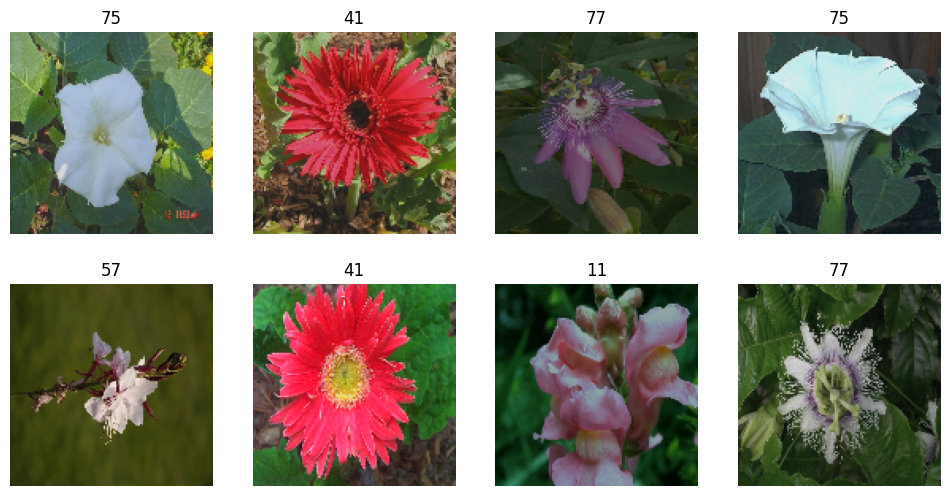

In [24]:
images = open_images(x_train_paths[50:59])
labels = y_train[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.show()

### To assign label to a number or vice-versa

In [25]:
def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(d[unique_labels[x]])
    return np.array(decoded)

### Data Generator
Given a list of paths to images, and the labels, this function augments the images, normalizes them, encodes the label, and then returns the batch on which the model can train on.

In [26]:
def data_gen(paths, labels, batch_size=12, epochs=3, augment=True):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths, augment=augment)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

### MODEL
- Using VGG16: VGG16 is a convolutional neural network model that's used for image recognition. It has 16 layers that have weights. It's considered one of the best vision model architectures.
- VGG16 is used to implement transfer learning 
- transfer learning: Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

In [27]:
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [28]:
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(unique_labels), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [29]:
model.compile(optimizer=Adam(learning_rate=0.000175),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

### Training the Model

In [45]:
batch_size = 32
steps = int(len(x_train_paths)/batch_size)
epochs = 6
history = model.fit(data_gen(x_train_paths, y_train, batch_size=batch_size, epochs=epochs, augment=True),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/6
204/204 [==============================] - 193s 945ms/step - loss: 0.8700 - sparse_categorical_accuracy: 0.7570
Epoch 2/6
204/204 [==============================] - 194s 952ms/step - loss: 0.7030 - sparse_categorical_accuracy: 0.8023
Epoch 3/6
204/204 [==============================] - 196s 960ms/step - loss: 0.5984 - sparse_categorical_accuracy: 0.8291
Epoch 4/6
204/204 [==============================] - 196s 959ms/step - loss: 0.4925 - sparse_categorical_accuracy: 0.8609
Epoch 5/6
204/204 [==============================] - 196s 960ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.8810
Epoch 6/6
204/204 [==============================] - 197s 963ms/step - loss: 0.3483 - sparse_categorical_accuracy: 0.9008


### Model Traning History Plot¶

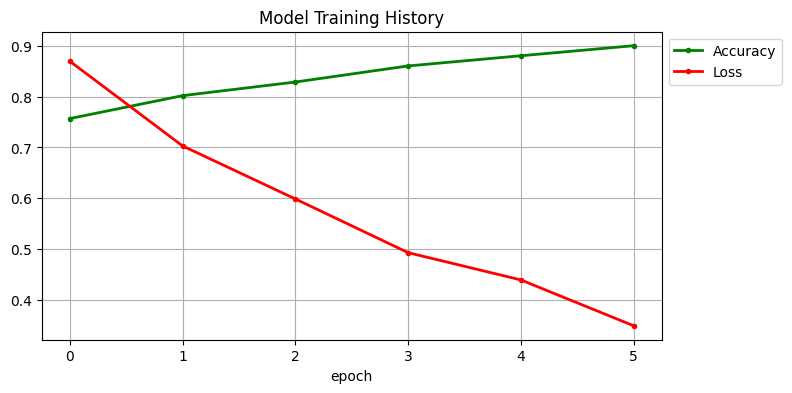

In [46]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Evaluating the Model with Validation Set

In [47]:
batch_size=32
steps = int(len(x_val_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(data_gen(x_val_paths, y_val, batch_size=batch_size, epochs=1, augment=False), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

52it [00:36,  1.43it/s]                                                         


In [48]:
print(classification_report(y_true, y_pred))

                           precision    recall  f1-score   support

         alpine sea holly       0.88      1.00      0.93         7
                anthurium       0.86      0.80      0.83        15
                artichoke       0.73      0.62      0.67        13
                   azalea       0.73      0.80      0.76        20
                ball moss       0.73      0.73      0.73        11
           balloon flower       0.43      0.33      0.38         9
           barbeton daisy       0.96      0.83      0.89        30
             bearded iris       0.78      1.00      0.88         7
                 bee balm       1.00      0.71      0.83         7
         bird of paradise       1.00      1.00      1.00        11
       bishop of llandaff       1.00      0.96      0.98        23
         black-eyed susan       1.00      1.00      1.00         5
          blackberry lily       0.54      1.00      0.70         7
           blanket flower       0.71      1.00      0.83     

## Saving the Model

In [49]:
model.save("flower102save")

INFO:tensorflow:Assets written to: flower102save/assets


## Load the Model

In [14]:
model = models.load_model("flower102save")

## Predict Class of New Image

In [15]:
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('Prediction/rose.jpeg',target_size=(IMAGE_SIZE,IMAGE_SIZE))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [16]:
pred = np.argmax(result) # get the index of max value
print(d[unique_labels[pred]])

rose


## Predict Class of All Images from Prediction Folder

In [17]:
pred_paths = []
pred_labels = []
pred_dir = 'Prediction/'

#extracting the list of images and their respective classes
for image in os.listdir(pred_dir):
    pred_paths.append(pred_dir+image)
    test_image = tf.keras.utils.load_img(pred_dir+image,target_size=(IMAGE_SIZE,IMAGE_SIZE))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    pred = np.argmax(result) # get the index of max value
    pred_labels.append(d[unique_labels[pred]])

In [18]:
def open_pred_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = np.array(image)
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

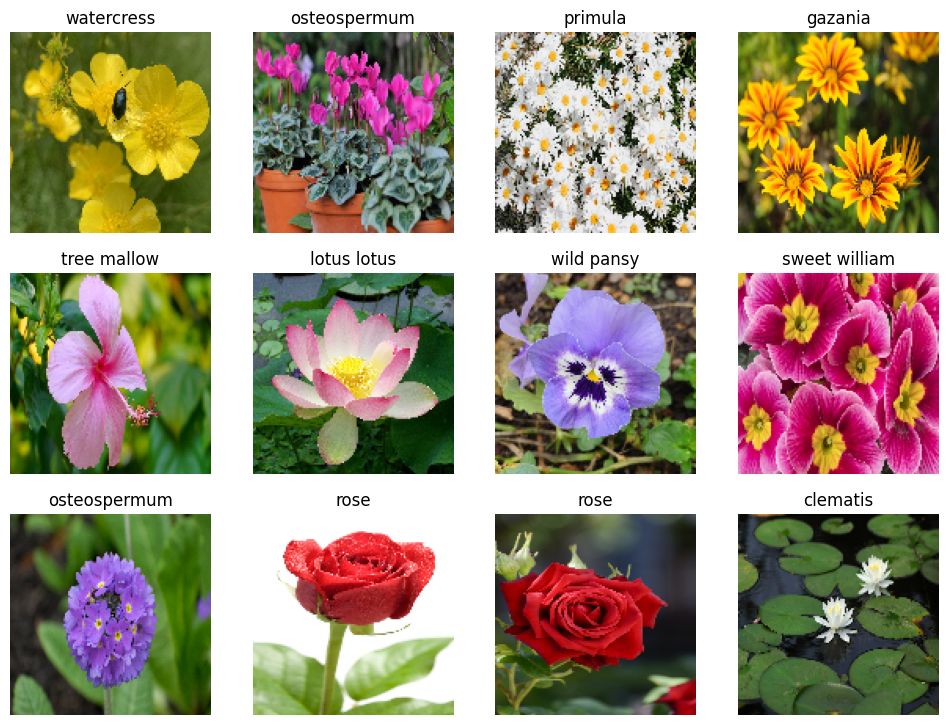

In [11]:
number_of_files = len(pred_paths)
rows = number_of_files//4 + 1
pred_images = open_pred_images(pred_paths[0:number_of_files])
fig = plt.figure(figsize=(12, 3*rows))

for x in range(0,number_of_files):
    fig.add_subplot(rows, 4, x+1)
    plt.axis('off')
    plt.title(pred_labels[x])
    plt.imshow(pred_images[x])
plt.show()